# Ch06 Pandas DataFrame 統計檢定

## Bi-variate Analysis (多變量分析)

Descriptive statistics between two or more variables

In statistics, when analyzing relationships between different types of variables—categorical (qualitative) and continuous (quantitative)—there are various methods used. Here's a brief overview:

1. Categorical vs. Continuous:
- Box Plots: A box plot for each category can show the distribution of a continuous variable.
- ANOVA (Analysis of Variance): Tests if there are statistically significant differences between the means of three or more independent (unrelated) groups.
- T-Test: If you only have two groups, a T-test can be used to determine if there is a significant difference between the means.
- Covariance and Correlation: Measures the direction and strength of the relationship between two continuous variables.
- Regression Analysis: Used to predict the value of a dependent (target) variable based on the value of an independent (predictor) variable.

2. Categorical vs. Categorical:
- Contingency Table (Cross-tabulation): Shows the frequency distribution of the variables.
- Chi-Squared Test: Tests the independence of two categorical variables.
- Fisher's Exact Test: Used for small sample sizes to determine if there are nonrandom associations between two categorical variables.

3. Continuous vs. Continuous:
- Scatter Plot: To visualize the relationship between two continuous variables.
- Pearson Correlation: To measure the linear correlation between two continuous variables.
- Spearman's Rank Correlation: To measure the strength and direction of association between two ranked variables.
- Regression Analysis: Can be simple linear regression for one predictor variable or multiple regression for more than one predictor.


---
# Continuous vs. Continuous

在統計檢定的背景下，當我們處理兩個連續變量（Continuous vs. Continuous）時，<br>
主要有以下幾種方法可以用來分析和視覺化它們之間的關係：

- 皮爾森相關係數(Pearson Correlation)
- 斯皮爾曼等級相關係數(Spearman's Rank Correlation)
- 迴歸分析(Regression Analysis)
  
來檢測兩個分類變數之間是否獨立。

---
### 散點圖（Scatter Plot）
案例說明：假設我們有一個數據集，包含了一系列人的身高（height）和體重（weight）數據。散點圖可以用來視覺化身高和體重之間的關係，每一個點代表一個人的身高和體重。

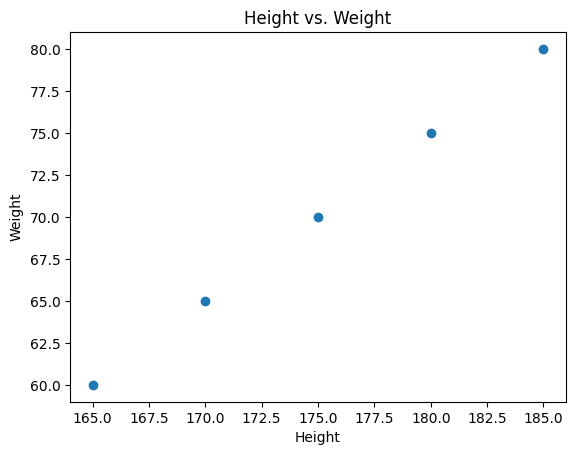

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 生成數據集的例子
data = {'height': [165, 170, 175, 180, 185],
        'weight': [60, 65, 70, 75, 80]}
df = pd.DataFrame(data)

# 散點圖
plt.scatter(df['height'], df['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.show()


- 注意事項：

檢查是否有離群值，它們可能會影響散點圖的解讀。
考慮數據的分布，確保它們適合用散點圖來表示。

- 解讀：
 
通過觀察散點圖，我們可以初步判斷兩個變量之間是否存在某種關聯（正相關、負相關或無相關）。

### 皮爾森相關係數（Pearson Correlation）
案例說明：使用相同的身高和體重數據，我們可以計算皮爾森相關係數，以量化它們之間的線性關係強度。

In [2]:
from scipy.stats import pearsonr

# 計算皮爾森相關係數
corr, _ = pearsonr(df['height'], df['weight'])
print('Pearson correlation:', corr)


Pearson correlation: 1.0


### 斯皮爾曼等級相關係數（Spearman's Rank Correlation）

斯皮爾曼等級相關係數（Spearman's Rank Correlation）主要用於評估兩個變量之間的單調關係強度。與皮爾森相關係數不同，斯皮爾曼相關係數不要求數據滿足正態分布，也不假設變量之間有線性關係，只需滿足以下前提條件：

- 單調性：兩個變量之間的關係應當是單調的，無論是單調增加還是單調減少。不需要是線性關係，但每當一個變量增加，另一個變量也應保持同方向的變化（增加或減少）。
- 序等級：斯皮爾曼相關係數基於變量值的排名而不是實際值。因此，對數據的量測等級有要求，至少是序數等級。

案例說明：如果數據不符合正態分布或關係不是線性的，我們可以使用斯皮爾曼等級相關來評估變量之間的關聯。

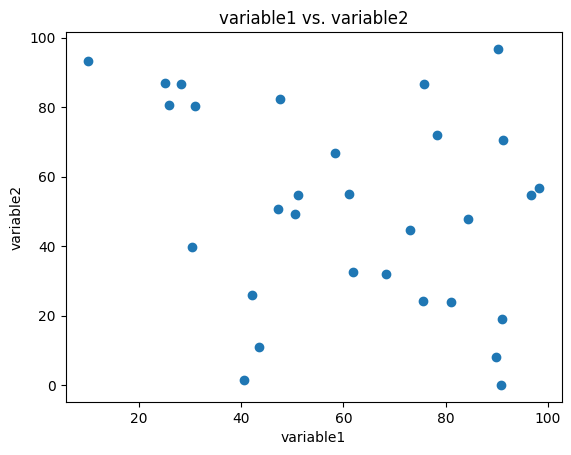

Spearman's rank correlation coefficient: -0.263
P-value: 0.160


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import random

# 使用random生成隨機數據
random.seed(0)  # 確保範例的可重現性
data = {
    'variable1': [random.uniform(0, 100) for _ in range(30)],
    'variable2': [random.uniform(0, 100) for _ in range(30)]
}

df = pd.DataFrame(data)

# 散點圖
plt.scatter(df['variable1'], df['variable2'])
plt.xlabel('variable1')
plt.ylabel('variable2')
plt.title('variable1 vs. variable2')
plt.show()

# 計算斯皮爾曼等級相關係數
spearman_corr, spearman_p_value = spearmanr(df['variable1'], df['variable2'])

print(f"Spearman's rank correlation coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


要在統計上驗證數據是否符合正態分布或關係是否為線性的，我們可以使用幾種方法：

## 驗證數據是否符合正態分布
- 視覺化方法：使用直方圖（Histogram）和QQ圖（Quantile-Quantile Plot）進行視覺檢查。
- 統計檢定：執行Shapiro-Wilk檢定或Kolmogorov-Smirnov檢定等。

## 驗證數據關係是否為線性
- 視覺化方法：繪製散點圖查看數據點的分佈情況，評估變量之間的關係是否接近直線。
- 統計方法：計算變量之間的皮爾森相關係數，雖然這主要用於衡量線性關係的強度和方向，但如果相關係數非常低，可能暗示關係不是線性的。

符合正態分布的數據 Normal distribution (Shapiro-Wilk test):
Statistics=0.993, p=0.869


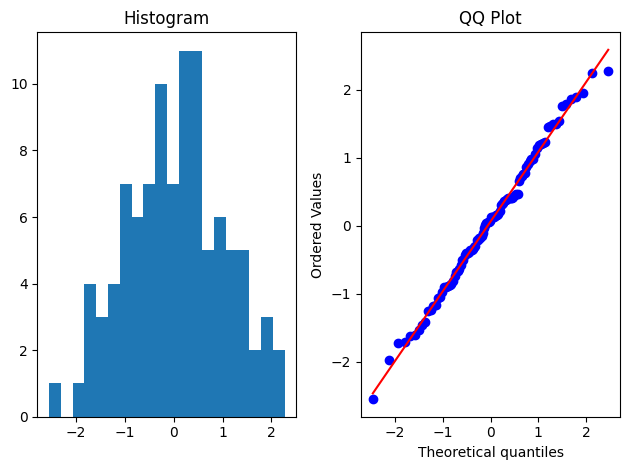

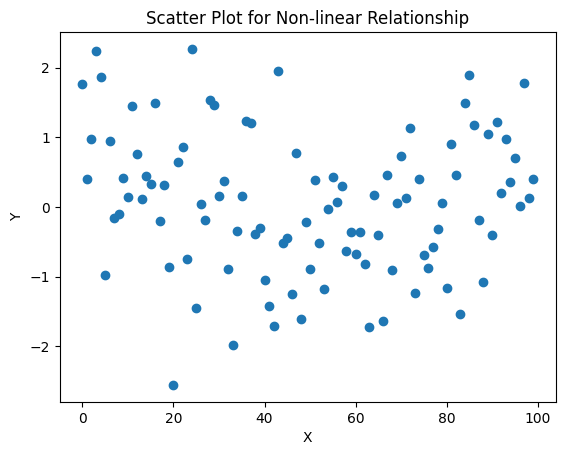

非線性關係的數據 Non-Normal distribution (Shapiro-Wilk test):
Statistics=0.877, p=0.000


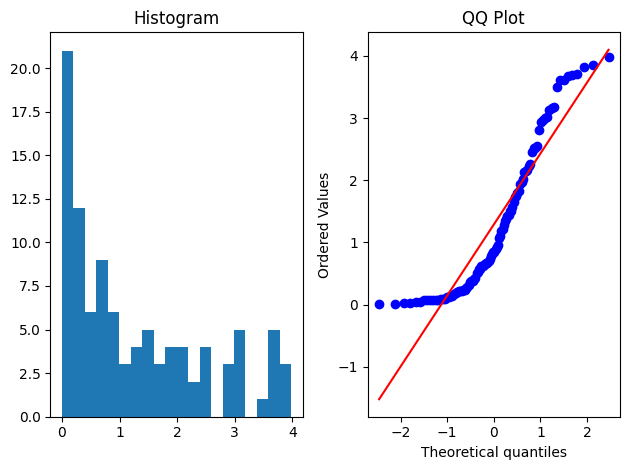

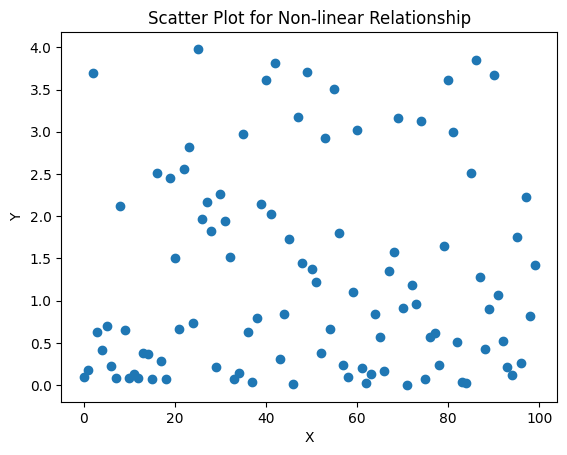

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# 生成範例數據
np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=100)  # 符合正態分布的數據
data_nonlinear = np.random.uniform(low=-2, high=2, size=100) ** 2  # 非線性關係的數據

# 正態分布檢定 - Shapiro-Wilk Test
stat, p = stats.shapiro(data_normal)
print('符合正態分布的數據 Normal distribution (Shapiro-Wilk test):' )
print("Statistics=%.3f, p=%.3f" % (stat, p))

# 繪製直方圖和QQ圖進行視覺檢查
plt.subplot(1, 2, 1)
plt.hist(data_normal, bins=20)
plt.title('Histogram')

plt.subplot(1, 2, 2)
stats.probplot(data_normal, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

# 繪製散點圖評估線性關係
plt.scatter(np.arange(len(data_normal)), data_normal)
plt.title('Scatter Plot for Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# 正態分布檢定 - Shapiro-Wilk Test
stat, p = stats.shapiro(data_nonlinear)
print('非線性關係的數據 Non-Normal distribution (Shapiro-Wilk test):' )
print("Statistics=%.3f, p=%.3f" % (stat, p))

# 繪製直方圖和QQ圖進行視覺檢查
plt.subplot(1, 2, 1)
plt.hist(data_nonlinear, bins=20)
plt.title('Histogram')

plt.subplot(1, 2, 2)
stats.probplot(data_nonlinear, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

# 繪製散點圖評估線性關係
plt.scatter(np.arange(len(data_nonlinear)), data_nonlinear)
plt.title('Scatter Plot for Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
